In [1]:
import pandas as pd
import numpy as np
from faker import Faker

# Инициализация генератора случайных данных
fake = Faker()

np.random.seed(0)
num_records = 10000
# Данные о рекламных расходах и продажах
ad_cost = 15000  # Затраты на рекламу в долларах
sales_revenue = 45000  # Прибыль от продаж в долларах

data = {
    'user_id': [fake.uuid4() for _ in range(num_records)],
    'age': np.random.randint(25, 41, size=num_records),
    'gender': np.random.choice(['Male', 'Female'], size=num_records),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Philadelphia'], size=num_records),
    'ad_channel': np.random.choice(['Social Media', 'Search Engine', 'Display Ads'], size=num_records),
    'conversion': np.random.choice([0, 1], size=num_records, p=[0.8, 0.2])  # 20% конверсия
}

df_users = pd.DataFrame(data)
ad_impressions = num_records
new_customers = df_users['conversion'].sum()
sales = df_users['conversion'].sum()
conversion_rate = (sales / ad_impressions) * 100
cac = ad_cost / new_customers if new_customers > 0 else 0
roi = ((sales_revenue - ad_cost) / ad_cost) * 100

print("Генерированные данные:")
print(df_users.head())

print("\nМетрики:")
print(f"Конверсия: {conversion_rate:.2f}%")
print(f"Стоимость привлечения клиента (CAC): ${cac:.2f}")
print(f"Возврат инвестиций (ROI): {roi:.2f}%")

df_users.to_csv('user_data.csv', index=False)


Генерированные данные:
                                user_id  age  gender          city  \
0  38e80421-b258-41b7-81ea-91e85e7e628e   37  Female  Philadelphia   
1  d0f59c38-12a1-4974-9a30-c459e78c96f5   40  Female      New York   
2  ff151373-2bbe-406f-bab4-be0e796c0e41   30  Female       Houston   
3  fe577016-0a98-41e4-95bb-4191043ec183   25    Male  Philadelphia   
4  5366834c-9f16-4b82-9164-d4ace5749cbc   28    Male   Los Angeles   

      ad_channel  conversion  
0   Social Media           0  
1   Social Media           0  
2  Search Engine           0  
3  Search Engine           0  
4    Display Ads           0  

Метрики:
Конверсия: 19.69%
Стоимость привлечения клиента (CAC): $7.62
Возврат инвестиций (ROI): 200.00%


In [2]:
df_users

,user_id,age,gender,city,ad_channel,conversion
0,38e80421-b258-41b7-81ea-91e85e7e628e,37,Female,Philadelphia,Social Media,0
1,d0f59c38-12a1-4974-9a30-c459e78c96f5,40,Female,New York,Social Media,0
2,ff151373-2bbe-406f-bab4-be0e796c0e41,30,Female,Houston,Search Engine,0
3,fe577016-0a98-41e4-95bb-4191043ec183,25,Male,Philadelphia,Search Engine,0
4,5366834c-9f16-4b82-9164-d4ace5749cbc,28,Male,Los Angeles,Display Ads,0
...,...,...,...,...,...,...
9995,f08e6b4b-b067-407c-aa6d-2b19731c98c5,31,Female,New York,Social Media,0
9996,85a68f77-b3ca-4401-8ede-c01d54a5e6eb,26,Female,Houston,Display Ads,1
9997,7cf8fed3-c736-4f1a-ae93-7b4e46e668c2,39,Male,Chicago,Search Engine,0
9998,0b4dbc87-2cbf-405a-87c3-4987e146797c,36,Male,Los Angeles,Display Ads,0


In [3]:
# группировка по рекламному каналу
channel_metrics = df_users.groupby("ad_channel").agg(
    impressions=('user_id', 'count'),
    conversions=('conversion', 'sum')
).reset_index()

# расчёт метрик конверсии и CAC для каждого канала
# так как нам неизвестно распределение рекламного бюджета на каждый канал, то расчёт CAC по каналу рассчитывался гипотетически с разделённым на 3 ad_cost
channel_metrics['conversion_rate'] = (channel_metrics['conversions'] / channel_metrics['impressions']) * 100
channel_metrics['cac'] = (ad_cost / 3) / channel_metrics['conversions']

print("\nМетрики по рекламному каналу:")
print(channel_metrics)



Метрики по рекламному каналу:
      ad_channel  impressions  conversions  conversion_rate       cac
0    Display Ads         3299          655        19.854501  7.633588
1  Search Engine         3361          667        19.845284  7.496252
2   Social Media         3340          647        19.371257  7.727975


In [4]:

# расчет демографических метрик

# по возрасту 
age_metrics = df_users.groupby('age').agg(
    impressions=('user_id', 'count'),
    conversions=('conversion', 'sum')
).reset_index()
age_metrics['conversion_rate'] = (age_metrics['conversions'] / age_metrics['impressions']) * 100

# или по возрастной группе (25-30, 31-35, 36-40)
bins= [25,30,35,41]
labels = ['25-30','30-35','36-40']
age_metrics['age_group'] = pd.cut(age_metrics['age'], bins=bins, labels=labels, right=False)
age_group_metrics = age_metrics.groupby('age_group', observed=True).agg(
    impressions=('impressions', 'sum'),
    conversions=('conversions', 'sum'),
).reset_index()
age_group_metrics['conversion_rate'] = (age_group_metrics['conversions'] / age_group_metrics['impressions']) * 100
print("\nКонверсия по возрастной группе:")
print(age_group_metrics[['age_group', 'conversion_rate']])

# по полу
gender_metrics = df_users.groupby('gender').agg(
    impressions=('user_id', 'count'),
    conversions=('conversion', 'sum')
).reset_index()
gender_metrics['conversion_rate'] = (gender_metrics['conversions'] / gender_metrics['impressions']) * 100
print("\nКонверсия по полу:")
print(gender_metrics[['gender', 'conversion_rate']])


# по городу
city_metrics = df_users.groupby('city').agg(
    impressions=('user_id', 'count'),
    conversions=('conversion', 'sum')
).reset_index()
city_metrics['conversion_rate'] = (city_metrics['conversions'] / city_metrics['impressions']) * 100
print("\nКонверсия по городу:")
print(city_metrics[['city', 'conversion_rate']])



Конверсия по возрастной группе:
  age_group  conversion_rate
0     25-30        20.165658
1     30-35        19.865643
2     36-40        19.143240

Конверсия по полу:
   gender  conversion_rate
0  Female        19.759036
1    Male        19.621514

Конверсия по городу:
           city  conversion_rate
0       Chicago        20.108161
1       Houston        20.665673
2   Los Angeles        20.326864
3      New York        18.181818
4  Philadelphia        19.151037


In [5]:

# группирование по всем характеристикам для нахождения комбинации с самой максимальной конверсией
demographic_metrics = df_users.groupby(['age', 'gender', 'city']).agg(
    impressions=('user_id', 'count'),
    conversions=('conversion', 'sum')
).reset_index()

demographic_metrics['conversion_rate'] = (demographic_metrics['conversions'] / demographic_metrics['impressions']) * 100

print("\nДемографическая группа с максимальной конверсией:")
print(demographic_metrics.loc[demographic_metrics['conversion_rate'].idxmax()])


Демографическая группа с максимальной конверсией:
age                       33
gender                  Male
city                 Houston
impressions               54
conversions               19
conversion_rate    35.185185
Name: 86, dtype: object


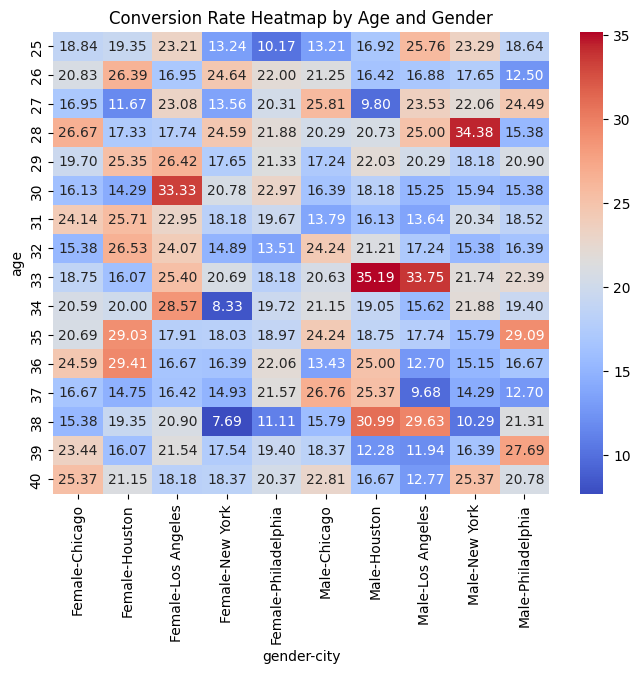

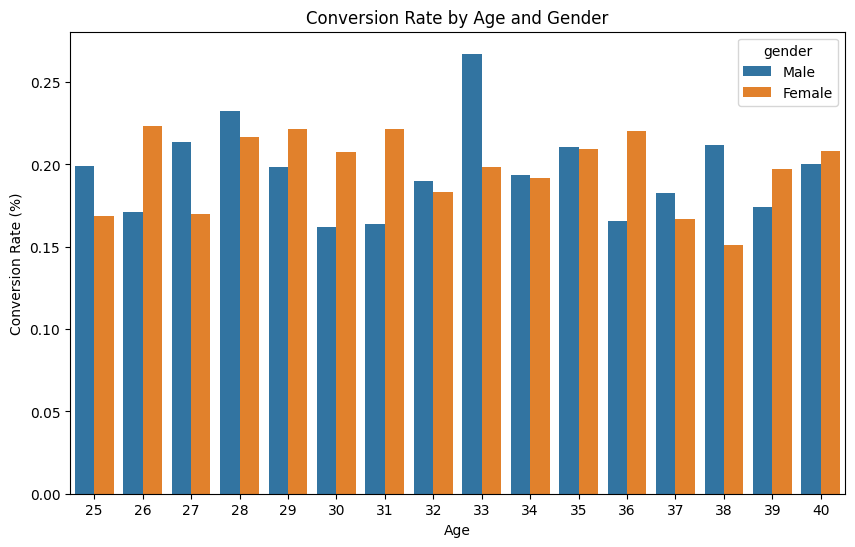

In [6]:
# графика

import matplotlib.pyplot as plt
import seaborn as sns

# хитмап по демографическим характеристикам
heatmap_data = demographic_metrics.pivot_table(index='age', columns=['gender', 'city'], values='conversion_rate')
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Conversion Rate Heatmap by Age and Gender')
plt.show()

# столбчатая диаграмма по полу и возрасту
age_gender_metrics = demographic_metrics.groupby(['age', 'gender']).agg(
    impressions=('impressions', 'sum'),
    conversions=('conversions', 'sum')
).reset_index()
age_gender_metrics['conversion_rate'] = (age_gender_metrics['conversions'] / age_gender_metrics['impressions']) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='conversion', hue='gender', data=df_users, errorbar=None)
plt.title('Conversion Rate by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Conversion Rate (%)')
plt.show()

In [7]:
# хи-квадрат
from scipy.stats import chi2_contingency

conversion_by_channel = pd.crosstab(df_users['ad_channel'], df_users['conversion'])

chi2_stat, p_val, dof, ex = chi2_contingency(conversion_by_channel)

print(f"Chi-square Statistic: {chi2_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Существует статистически значимая разница в коэффициентах конверсии по разным каналам.")
else:
    print("Не существует статистически значимой разницы в коэффициентах конверсии по разным каналам.")


# дисперсионный анализ (one-way ANOVA)
from scipy.stats import f_oneway

age_values = df_users.groupby('age')['conversion']

f_stat, p_val = f_oneway(*[group for _, group in age_values])

print(f"F-statistic: {f_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Существует статистически значимая разница в коэффициентах конверсии по возрастам.")
else:
    print("Статистически значимых различий между возрастами нет.")

# лог. регрессия
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = pd.get_dummies(df_users[['age', 'gender', 'ad_channel']], drop_first=True)
y = df_users['conversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точночть лог. регрессии: {accuracy:.2f}")

Chi-square Statistic: 0.32, P-value: 0.8512
Не существует статистически значимой разницы в коэффициентах конверсии по разным каналам.
F-statistic: 1.03, P-value: 0.4156
Статистически значимых различий между возрастами нет.
Точночть лог. регрессии: 0.80
